In [1]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
class BranchGenParticles:
    def __init__(self,file):
        self.file = file
        self.length = len(file["Particle.Status"].array())
        self.Status = file["Particle.Status"].array()
        self.PID = file["Particle.PID"].array()
        self.M1 = file["Particle.M1"].array()
        self.M2 = file["Particle.M2"].array()
        self.D1 = file["Particle.D1"].array()
        self.D2  = file["Particle.D2"].array()
        self.PT = file["Particle.PT"].array()
        self.Eta =  file["Particle.Eta"].array()
        self.Phi = file["Particle.Phi"].array()
        self.Mass = file["Particle.Mass"].array()
        self.Charge = file["Particle.Charge"].array()
        self.Labels = ["Status", "PID" , "M1", "M2", "D1", "D2", "PT", "Eta", "Phi", "Mass","Charge"]
        
    def length_At(self, i):
        return len(self.Status[i])
    def Status_At(self, i):
        return self.Status[i]
    def PID_At(self, i):
        return self.PID[i]
    def M1_At(self, i):
        return self.M1[i]
    def M2_At(self, i):
        return self.M2[i]
    def D1_At(self, i):
        return self.D1[i]
    def D2_At(self, i):
        return self.D2[i]
    def PT_At(self, i):
        return self.PT[i]
    def Eta_At(self, i):
        return self.Eta[i]
    def Phi_At(self, i):
        return self.Phi[i]
    def Mass_At(self, i):
        return self.Mass[i]
    def Charge_At(self, i):
        return self.Charge[i]
    
def DeltaR(eta1, phi1, eta2, phi2):
    dEta = eta1-eta2
    dPhi = abs(phi1-phi2)
    if dPhi > np.pi:
        dPhi = 2*np.pi - dPhi

    dR = (dPhi**2 + dEta**2)**0.5

    return dR

def FourVectorbb(pt1,eta1,phi1,m1,pt2,eta2,phi2,m2):
    px1, py1, pz1 = pt1*np.cos(phi1), pt1*np.sin(phi1), np.sqrt(m1**2+pt1**2)*np.sinh(eta1)
    e1 = np.sqrt(m1**2 + px1**2 + py1**2 + pz1**2)
    px2, py2, pz2 = pt2*np.cos(phi2), pt2*np.sin(phi2), np.sqrt(m2**2+pt2**2)*np.sinh(eta2)
    e2 = np.sqrt(m2**2 + px2**2 + py2**2 + pz2**2)
    
    m = np.sqrt((e1+e2)**2-(px1+px2)**2-(py1+py2)**2-(pz1+pz2)**2)
    pt = np.sqrt((px1+px2)**2 + (py1+py2)**2)
    eta = np.arcsinh((pz1+pz2)/np.sqrt(m**2+pt**2))
    phi = np.arcsin((py1+py2)/pt)
    
    return pt, eta, phi, m

def Mbb(b1,b2):
    pt1, eta1, phi1, m1 = b1[0], b1[1], b1[2], b1[3]
    pt2, eta2, phi2, m2 = b2[0], b2[1], b2[2], b2[3]
    
    px1, py1, pz1 = pt1*np.cos(phi1), pt1*np.sin(phi1), np.sqrt(m1**2+pt1**2)*np.sinh(eta1)
    e1 = np.sqrt(m1**2 + px1**2 + py1**2 + pz1**2)
    px2, py2, pz2 = pt2*np.cos(phi2), pt2*np.sin(phi2), np.sqrt(m2**2+pt2**2)*np.sinh(eta2)
    e2 = np.sqrt(m2**2 + px2**2 + py2**2 + pz2**2)
    
    return np.sqrt((e1+e2)**2-(px1+px2)**2-(py1+py2)**2-(pz1+pz2)**2)

In [3]:
def get_PT_Eta(file_path):
    root_file = uproot.open(file_path)["Delphes;1"]
    GenParticle = BranchGenParticles(root_file)
    
    b_PT, b_Eta = [], []
    
    for i in range(min(GenParticle.length,1000)):
        # get all b quarks index
        b_index = np.arange(len(GenParticle.PID[i]))[(GenParticle.PID[i] == 5) | (GenParticle.PID[i] == -5)]
        initial_b_index = [b for b in b_index if (GenParticle.M1[i][b] not in b_index) and (GenParticle.M2[i][b] not in b_index)]

        for b in initial_b_index:
            b_PT.append(GenParticle.PT[i][b])
            b_Eta.append(GenParticle.Eta[i][b])
    
    return b_PT, b_Eta

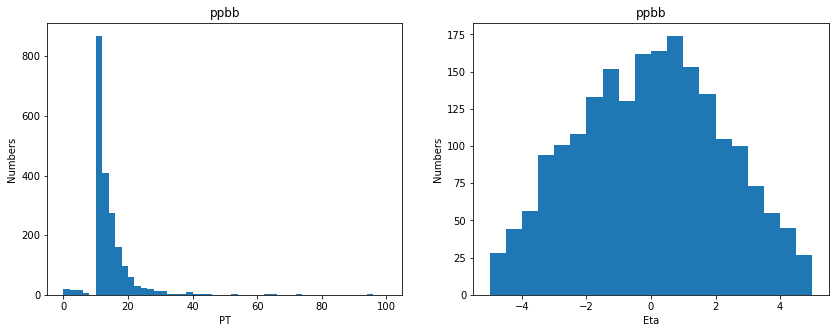

In [4]:
title = "ppbb"
file_path = "/home/r10222035/Software/MG5_aMC_v3_3_1/CPVDM/ppbb/Events/run_01/tag_1_delphes_events.root"
PT, Eta = get_PT_Eta(file_path)

fig, ax = plt.subplots(1,2, figsize=(14,5))

ax[0].hist(PT, bins=50, range=[0,100])
ax[0].set_xlabel("PT")
ax[0].set_ylabel("Numbers")
ax[0].set_title(title)

ax[1].hist(Eta, bins=20,range=[-5,5] )
ax[1].set_xlabel("Eta")
ax[1].set_ylabel("Numbers")
ax[1].set_title(title)

plt.savefig(title + "_PT_Eta.png")
plt.show()

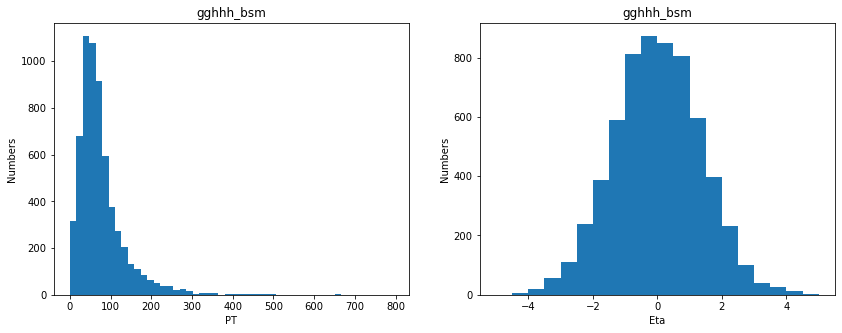

In [5]:
title = "gghhh_bsm"
file_path = "/home/r10222035/Software/MG5_aMC_v3_3_1/CPVDM/gghhh_bsm/Events/run_02/tag_1_delphes_events.root"
PT, Eta = get_PT_Eta(file_path)

fig, ax = plt.subplots(1,2, figsize=(14,5))

ax[0].hist(PT, bins=50)
ax[0].set_xlabel("PT")
ax[0].set_ylabel("Numbers")
ax[0].set_title(title)

ax[1].hist(Eta, bins=20,range=[-5,5])
ax[1].set_xlabel("Eta")
ax[1].set_ylabel("Numbers")
ax[1].set_title(title)

plt.savefig(title + "_PT_Eta.png")
plt.show()

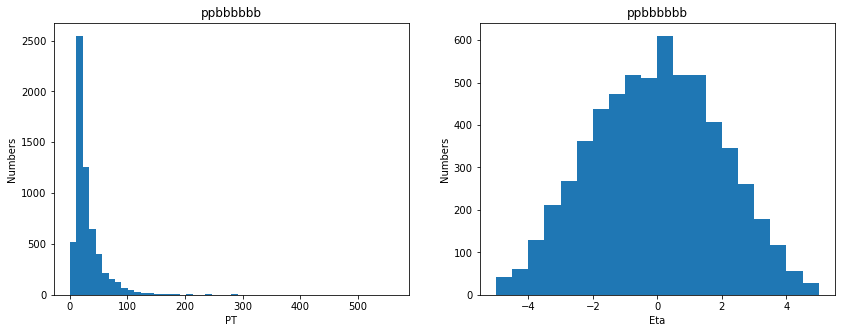

In [6]:
title = "ppbbbbbb"
file_path = "/home/r10222035/Software/MG5_aMC_v3_3_1/CPVDM/ppbbbbbb3/Events/run_01/tag_1_delphes_events.root"
PT, Eta = get_PT_Eta(file_path)

fig, ax = plt.subplots(1,2, figsize=(14,5))

ax[0].hist(PT, bins=50)
ax[0].set_xlabel("PT")
ax[0].set_ylabel("Numbers")
ax[0].set_title(title)

ax[1].hist(Eta, bins=20,range=[-5,5])
ax[1].set_xlabel("Eta")
ax[1].set_ylabel("Numbers")
ax[1].set_title(title)

plt.savefig(title + "_PT_Eta.png")
plt.show()

## pp -> 6b in SM

In [7]:
file_path = "/home/r10222035/Software/MG5_aMC_v3_3_1/CPVDM/ppbbbbbb3/Events/run_01/tag_1_delphes_events.root"

root_file = uproot.open(file_path)["Delphes;1"]
GenParticle = BranchGenParticles(root_file)

In [8]:
b_PT, b_Eta = [], []
for event in range(min(GenParticle.length,1000)):
    # get all b quarks index
    b_index = np.arange(len(GenParticle.PID[event]))[(GenParticle.PID[event]==5) | (GenParticle.PID[event]==-5)]
    initial_b_index = np.array([b for b in b_index if (GenParticle.M1[event][b] not in b_index) and (GenParticle.M2[event][b] not in b_index)])

    # b quarks index order by PT
    sort_arg = np.argsort(GenParticle.PT[event][initial_b_index])[::-1]
    sorted_b_index = initial_b_index[sort_arg]
    
    b_PT.append(GenParticle.PT[event][sorted_b_index[0:6]])
    b_Eta.append(GenParticle.Eta[event][sorted_b_index[0:6]])

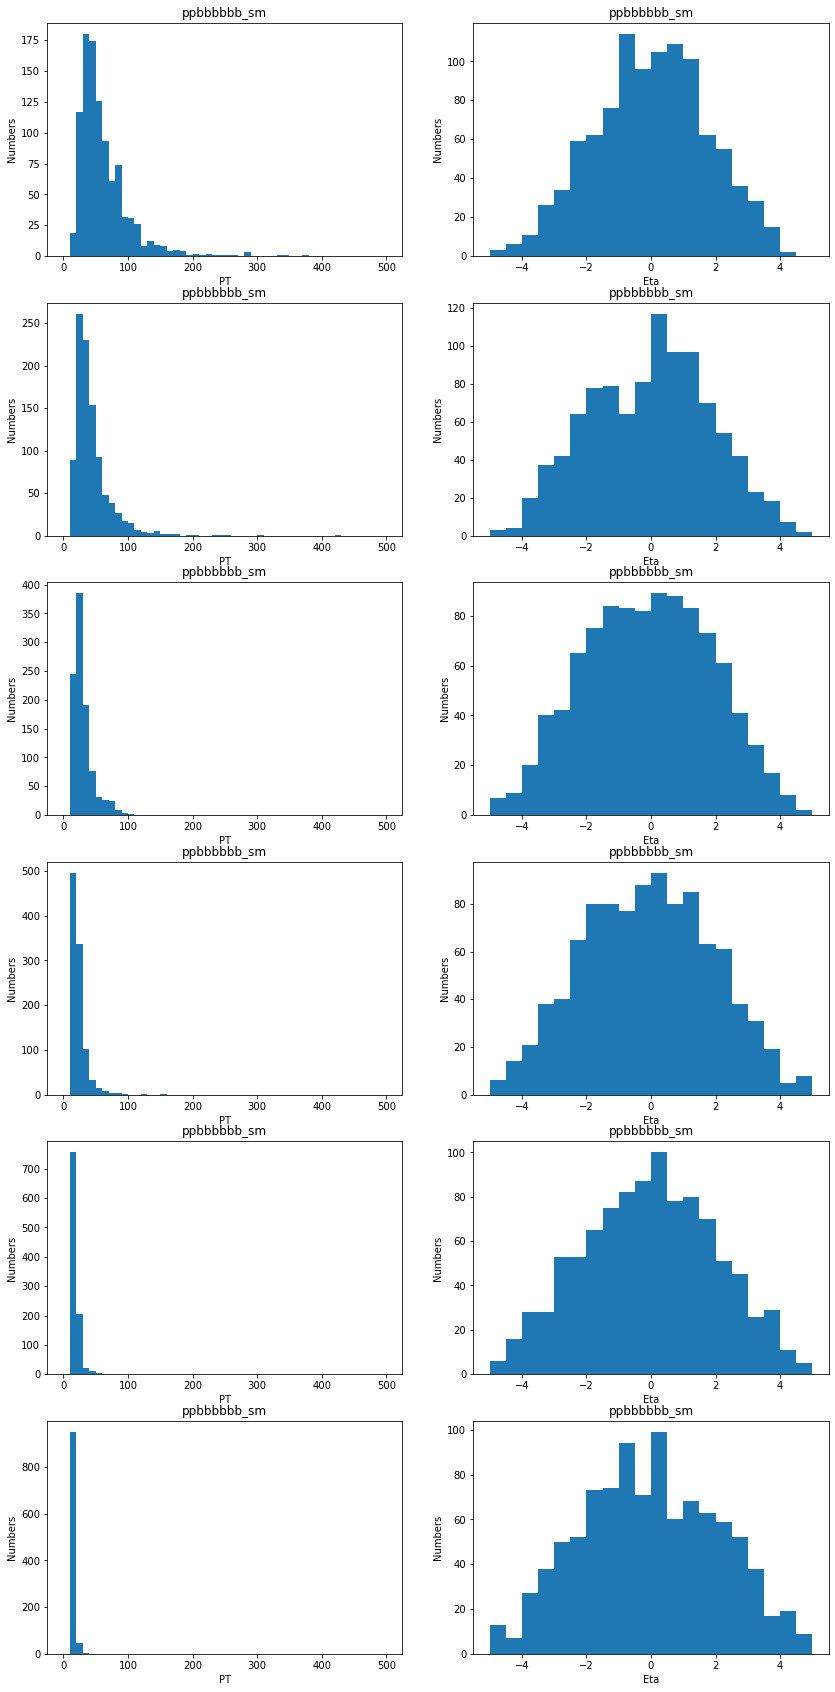

In [9]:
PT = np.array(b_PT)
Eta = np.array(b_Eta)

title = "ppbbbbbb_sm"

fig, ax = plt.subplots(6, 2, figsize=(14,30))

for i in range(len(ax)):
    ax[i,0].hist(PT[:,i], bins=50, range=[0,500])
    ax[i,0].set_xlabel("PT")
    ax[i,0].set_ylabel("Numbers")
    ax[i,0].set_title(title)

    ax[i,1].hist(Eta[:,i], bins=20,range=[-5,5])
    ax[i,1].set_xlabel("Eta")
    ax[i,1].set_ylabel("Numbers")
    ax[i,1].set_title(title)
    
plt.savefig(title + "_PT_Eta_order_by_PT.png")
plt.show()

## gg -> hhh in BSM

In [10]:
file_path = "/home/r10222035/Software/MG5_aMC_v3_3_1/CPVDM/gghhh_bsm/Events/run_02/tag_1_delphes_events.root"

root_file = uproot.open(file_path)["Delphes;1"]
GenParticle = BranchGenParticles(root_file)

In [11]:
b_PT, b_Eta, bb_dR, bb_PT = [], [], [], []
for event in range(min(GenParticle.length,1000)):
    # get all b quarks index
    b_index = np.arange(len(GenParticle.PID[event]))[(GenParticle.PID[event]==5) | (GenParticle.PID[event]==-5)]
    initial_b_index = np.array([b for b in b_index if (GenParticle.M1[event][b] not in b_index) and (GenParticle.M2[event][b] not in b_index)])

    # b quarks index order by PT
    sort_arg = np.argsort(GenParticle.PT[event][initial_b_index])[::-1]
    sorted_b_index = initial_b_index[sort_arg[0:6]]
    
    b_PT.append(GenParticle.PT[event][sorted_b_index])
    b_Eta.append(GenParticle.Eta[event][sorted_b_index])
    
    for i in range(len(sorted_b_index)):
        bi = sorted_b_index[i]
        for j in range(i+1,len(sorted_b_index)):
            bj = sorted_b_index[j]
            if GenParticle.M1[event][bi] == GenParticle.M1[event][bj]:
                pt1, eta1, phi1, m1 = GenParticle.PT[event][bi], GenParticle.Eta[event][bi], GenParticle.Phi[event][bi], GenParticle.Mass[event][bi]
                pt2, eta2, phi2, m2 = GenParticle.PT[event][bj], GenParticle.Eta[event][bj], GenParticle.Phi[event][bj], GenParticle.Mass[event][bj]

                dR = DeltaR(eta1, phi1, eta2, phi2)
                bb_dR.append(dR)
                
                pt, _, _, _ = FourVectorbb(pt1,eta1,phi1,m1,pt2,eta2,phi2,m2)
                bb_PT.append(pt)
                
                break

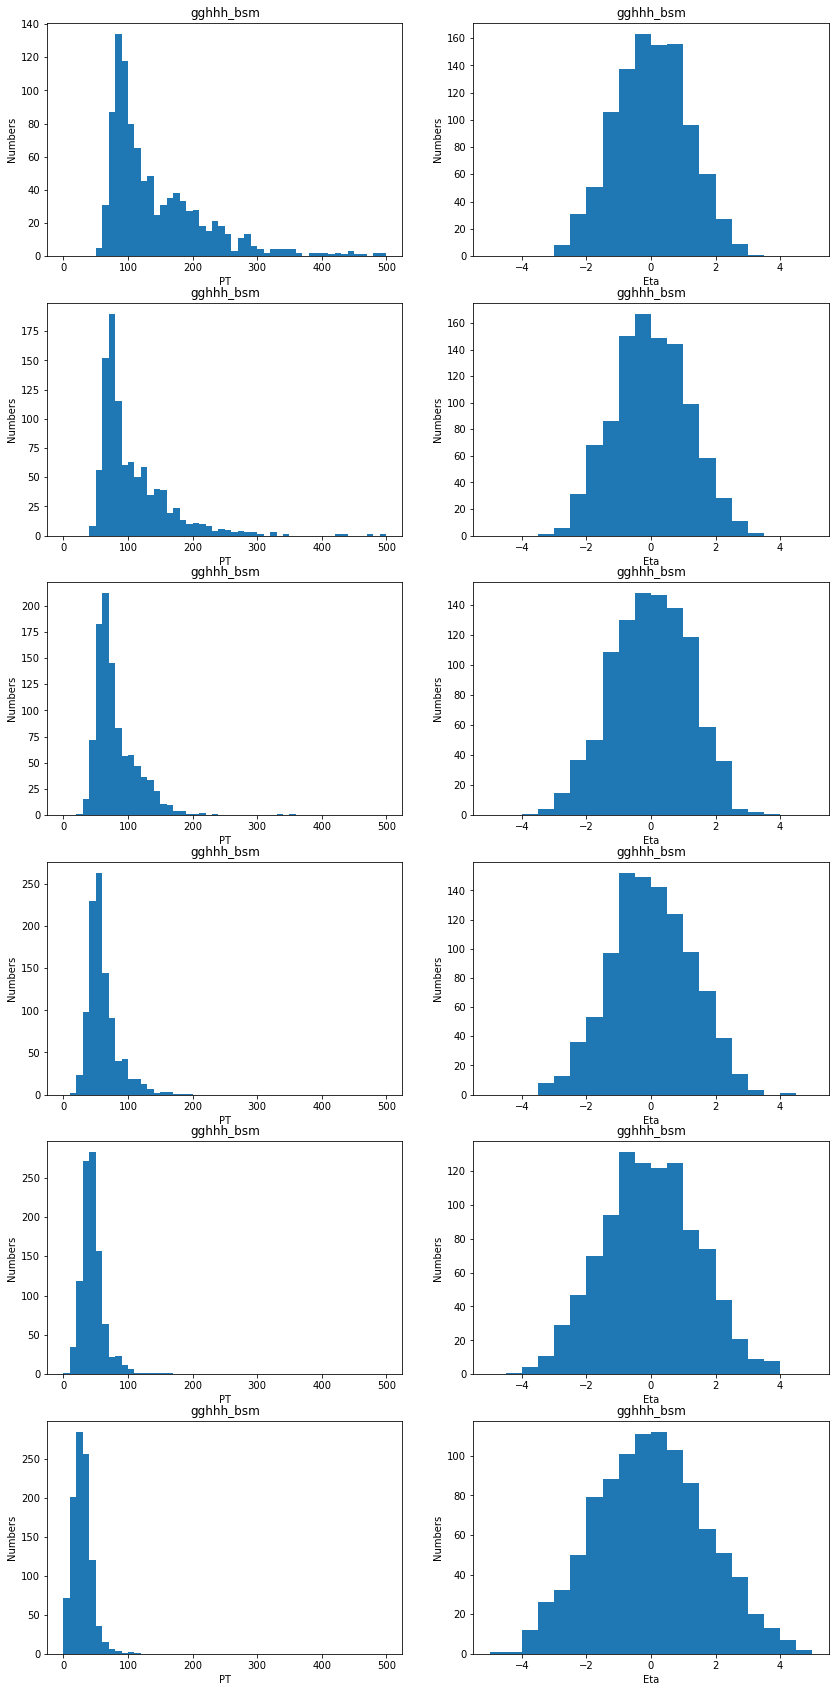

In [12]:
PT = np.array(b_PT)
Eta = np.array(b_Eta)

title = "gghhh_bsm"

fig, ax = plt.subplots(6, 2, figsize=(14,30))

for i in range(len(ax)):
    ax[i,0].hist(PT[:,i], bins=50, range=[0,500])
    ax[i,0].set_xlabel("PT")
    ax[i,0].set_ylabel("Numbers")
    ax[i,0].set_title(title)

    ax[i,1].hist(Eta[:,i], bins=20,range=[-5,5])
    ax[i,1].set_xlabel("Eta")
    ax[i,1].set_ylabel("Numbers")
    ax[i,1].set_title(title)
    
plt.savefig(title + "_PT_Eta_order_by_PT.png")
plt.show()

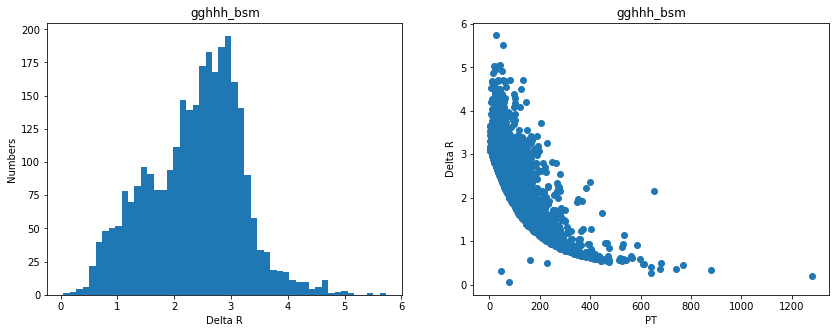

In [13]:
dR = np.array(bb_dR)
PT = np.array(bb_PT)

title = "gghhh_bsm"

fig, ax = plt.subplots(1, 2, figsize=(14,5))

ax[0].hist(dR, bins=50)
ax[0].set_xlabel("Delta R")
ax[0].set_ylabel("Numbers")
ax[0].set_title(title)

ax[1].scatter(PT, dR)
ax[1].set_xlabel("PT")
ax[1].set_ylabel("Delta R")
ax[1].set_title(title)

plt.savefig(title + "_bb_Delta_R.png")
plt.show()

## Cutflow Table

In [14]:
file_path = "/home/r10222035/Software/MG5_aMC_v3_3_1/CPVDM/ppbbbbbb3/Events/run_01/tag_1_delphes_events.root"

root_file = uproot.open(file_path)["Delphes;1"]
GenParticle = BranchGenParticles(root_file)

In [15]:
Eta_count = 0
PT25_count = 0
PT40_count = 0

nevent = min(GenParticle.length, 1000)
for event in range(nevent):
    # get all b quarks index
    b_index = np.arange(len(GenParticle.PID[event]))[(GenParticle.PID[event]==5) | (GenParticle.PID[event]==-5)]
    initial_b_index = np.array([b for b in b_index if (GenParticle.M1[event][b] not in b_index) and (GenParticle.M2[event][b] not in b_index)])

    # b quarks index order by PT
    sort_arg = np.argsort(GenParticle.PT[event][initial_b_index])[::-1]
    sorted_b_index = initial_b_index[sort_arg]
    
    # |eta| < 2.5
    b_index_eta_cut = sorted_b_index[(GenParticle.Eta[event][sorted_b_index]<2.5) & (GenParticle.Eta[event][sorted_b_index]>-2.5)]

    if len(b_index_eta_cut)>=6 :
        Eta_count += 1
        if np.array(GenParticle.PT[event][b_index_eta_cut]>25).astype("int").sum()>=6:
            PT25_count += 1
            if np.array(GenParticle.PT[event][b_index_eta_cut]>40).astype("int").sum()>=4:
                PT40_count += 1

print("pp->6b")
print("In", nevent, "events")
print("|eta| < 2.5 for 6 b-partons:", Eta_count)
print("PT > 25 GeV for 6 b-partons:", PT25_count)
print("PT > 40 GeV for 4 b-partons:", PT40_count)

pp->6b
In 1000 events
|eta| < 2.5 for 6 b-partons: 330
PT > 25 GeV for 6 b-partons: 11
PT > 40 GeV for 4 b-partons: 8


In [16]:
file_path = "/home/r10222035/Software/MG5_aMC_v3_3_1/CPVDM/gghhh_bsm/Events/run_02/tag_1_delphes_events.root"

root_file = uproot.open(file_path)["Delphes;1"]
GenParticle = BranchGenParticles(root_file)

In [17]:
Eta_count = 0
PT25_count = 0
PT40_count = 0

nevent = min(GenParticle.length, 1000)
for event in range(nevent):
    # get all b quarks index
    b_index = np.arange(len(GenParticle.PID[event]))[(GenParticle.PID[event]==5) | (GenParticle.PID[event]==-5)]
    initial_b_index = np.array([b for b in b_index if (GenParticle.M1[event][b] not in b_index) and (GenParticle.M2[event][b] not in b_index)])

    # b quarks index order by PT
    sort_arg = np.argsort(GenParticle.PT[event][initial_b_index])[::-1]
    sorted_b_index = initial_b_index[sort_arg]
    
    # |eta| < 2.5
    b_index_eta_cut = sorted_b_index[(GenParticle.Eta[event][sorted_b_index]<2.5) & (GenParticle.Eta[event][sorted_b_index]>-2.5)]

    if len(b_index_eta_cut)>=6 :
        Eta_count += 1
        if np.array(GenParticle.PT[event][b_index_eta_cut]>25).astype("int").sum()>=6:
            PT25_count += 1
            if np.array(GenParticle.PT[event][b_index_eta_cut]>40).astype("int").sum()>=4:
                PT40_count += 1

print("signal")
print("In", nevent, "events")
print("|eta| < 2.5 for 6 b-partons:", Eta_count)
print("PT > 25 GeV for 6 b-partons:", PT25_count)
print("PT > 40 GeV for 4 b-partons:", PT40_count)

signal
In 1000 events
|eta| < 2.5 for 6 b-partons: 750
PT > 25 GeV for 6 b-partons: 486
PT > 40 GeV for 4 b-partons: 459


## Consrtuct bb-pair

In [18]:
def all_pairs(lst):
    if len(lst) < 2:
        yield []
        return
    if len(lst) % 2 == 1:
        # Handle odd length list
        for i in range(len(lst)):
            for result in all_pairs(lst[:i] + lst[i+1:]):
                yield result
    else:
        a = lst[0]
        for i in range(1,len(lst)):
            pair = (a,lst[i])
            for rest in all_pairs(lst[1:i]+lst[i+1:]):
                yield [pair] + rest

all_bb_pairs = list(all_pairs([0,1,2,3,4,5]))
for i in all_bb_pairs:
    print(i)

[(0, 1), (2, 3), (4, 5)]
[(0, 1), (2, 4), (3, 5)]
[(0, 1), (2, 5), (3, 4)]
[(0, 2), (1, 3), (4, 5)]
[(0, 2), (1, 4), (3, 5)]
[(0, 2), (1, 5), (3, 4)]
[(0, 3), (1, 2), (4, 5)]
[(0, 3), (1, 4), (2, 5)]
[(0, 3), (1, 5), (2, 4)]
[(0, 4), (1, 2), (3, 5)]
[(0, 4), (1, 3), (2, 5)]
[(0, 4), (1, 5), (2, 3)]
[(0, 5), (1, 2), (3, 4)]
[(0, 5), (1, 3), (2, 4)]
[(0, 5), (1, 4), (2, 3)]


In [19]:
file_path = "/home/r10222035/Software/MG5_aMC_v3_3_1/CPVDM/gghhh_bsm/Events/run_02/tag_1_delphes_events.root"

root_file = uproot.open(file_path)["Delphes;1"]
GenParticle = BranchGenParticles(root_file)

In [20]:
m_higgs = 125.10

count1, count2 = 0, 0

nevent = min(GenParticle.length,10000)

for event in tqdm(range(nevent)):
    # get all b quarks index
    b_index = np.arange(len(GenParticle.PID[event]))[(GenParticle.PID[event]==5) | (GenParticle.PID[event]==-5)]
    initial_b_index = np.array([b for b in b_index if (GenParticle.M1[event][b] not in b_index) and (GenParticle.M2[event][b] not in b_index)])

    # b quarks index order by PT
    sort_arg = np.argsort(GenParticle.PT[event][initial_b_index])[::-1]
    sorted_b_index = initial_b_index[sort_arg[0:6]]

    pt = GenParticle.PT[event][sorted_b_index]
    eta = GenParticle.Eta[event][sorted_b_index]
    phi = GenParticle.Phi[event][sorted_b_index]
    m = GenParticle.Mass[event][sorted_b_index]
    
    b = np.array([pt, eta, phi, m])

    # Method 1: mass difference between all pair
    chisq = -1
    pair_id1 = 0
    for i, ((b1,b2),(b3,b4),(b5,b6)) in enumerate(all_bb_pairs):
        tem = (Mbb(b[:,b1],b[:,b2])-Mbb(b[:,b3],b[:,b4]))**2 + (Mbb(b[:,b1],b[:,b2])-Mbb(b[:,b5],b[:,b6]))**2 + (Mbb(b[:,b3],b[:,b4])-Mbb(b[:,b5],b[:,b6]))**2
        if (chisq < 0 or tem < chisq): 
            chisq = tem
            pair_id1 = i
    
    # Method 2: mass difference to the SM Higgs mass
    chisq = -1
    pair_id2 = 0
    for i, ((b1,b2),(b3,b4),(b5,b6)) in enumerate(all_bb_pairs):
        tem = (Mbb(b[:,b1],b[:,b2])-m_higgs)**2 + (Mbb(b[:,b3],b[:,b4])-m_higgs)**2 + (Mbb(b[:,b5],b[:,b6])-m_higgs)**2
        if (chisq < 0 or tem < chisq): 
            chisq = tem
            pair_id2 = i

    true_bb_pairs = []
    for i in range(len(sorted_b_index)):
        bi = sorted_b_index[i]
        for j in range(i+1,len(sorted_b_index)):
            bj = sorted_b_index[j]
            if GenParticle.M1[event][bi] == GenParticle.M1[event][bj]:
                true_bb_pairs.append((i,j))
                
                break

    if all_bb_pairs[pair_id1] == true_bb_pairs: count1 += 1
    if all_bb_pairs[pair_id2] == true_bb_pairs: count2 += 1

print("Method 1 (Mass difference between all pairs): {}, Accuracy = {}".format(count1, count1/nevent))
print("Method 2 (Mass difference to the SM Higgs mass): {}, Accuracy = {}".format(count2, count2/nevent))

100%|██████████████████████████████████████████████| 10000/10000 [04:39<00:00, 35.84it/s]

Method 1 (Mass difference between all pairs): 9379, Accuracy = 0.9379
Method 2 (Mass difference to the SM Higgs mass): 9475, Accuracy = 0.9475
